In [2]:
import tensorflow as tf
import numpy as np

In [3]:
tf.__version__

'1.6.0'

In [7]:
MAX_ATOMIC_NUMBER = 55 # Only up to cesium is treated. 
AtomFields =['symbol','name','atomicnum','mass','ns','np','nd','elecneg','radius','ione','elecaff','polariz']
AtomData = [['H','Hydrogen', 1.0, 1.00794, 1.0, 0.0, 0.0, 2.3, 53.0, 1312.0, 0.754195, 4.4923955],
['He','Helium', 2.0, 4.002602, 2.0, 0.0, 0.0, 4.16, 31.0, 2372.0, -0.52, 1.383191],
['Li','Lithium', 3.0, 6.941, 1.0, 0.0, 0.0, 0.912, 167.0, 520.0, 0.618049, 164.0],
['Be','Beryllium', 4.0, 9.012182, 2.0, 0.0, 0.0, 1.576, 112.0, 900.0, -0.52, 37.71],
['B','Boron', 5.0, 10.811, 2.0, 1.0, 0.0, 2.051, 87.0, 801.0, 0.279723, 20.53],
['C','Carbon', 6.0, 12.0107, 2.0, 2.0, 0.0, 2.544, 67.0, 1087.0, 1.2621226, 11.26],
['N','Nitrogen', 7.0, 14.0067, 2.0, 3.0, 0.0, 3.066, 56.0, 1402.0, -0.000725, 7.26],
['O','Oxygen', 8.0, 15.9994, 2.0, 4.0, 0.0, 3.61, 48.0, 1314.0, 1.4611136, 5.24],
['F','Fluorine', 9.0, 18.9984032, 2.0, 5.0, 0.0, 4.193, 42.0, 1681.0, 3.4011898, 3.7],
['Ne','Neon', 10.0, 20.1797, 2.0, 6.0, 0.0, 4.787, 38.0, 2081.0, -1.2, 2.67],
['Na','Sodium', 11.0, 22.98976928, 1.0, 0.0, 0.0, 0.869, 190.0, 496.0, 0.547926, 162.7],
['Mg','Magnesium', 12.0, 24.305, 2.0, 0.0, 0.0, 1.293, 145.0, 738.0, -0.415, 70.89],
['Al','Aluminum', 13.0, 26.9815386, 2.0, 1.0, 0.0, 1.613, 118.0, 578.0, 0.43283, 55.4],
['Si','Silicon', 14.0, 28.0855, 2.0, 2.0, 0.0, 1.916, 111.0, 787.0, 1.3895212, 37.31],
['P','Phosphorus', 15.0, 30.973762, 2.0, 3.0, 0.0, 2.253, 98.0, 1012.0, 0.746607, 24.93],
['S','Sulfur', 16.0, 32.065, 2.0, 4.0, 0.0, 2.589, 88.0, 1000.0, 2.0771042, 19.37],
['Cl','Chlorine', 17.0, 35.453, 2.0, 5.0, 0.0, 2.869, 79.0, 1251.0, 3.612724, 14.57],
['Ar','Argon', 18.0, 39.948, 2.0, 6.0, 0.0, 3.242, 71.0, 1521.0, -1.0, 11.07],
['K','Potassium', 19.0, 39.0983, 1.0, 0.0, 0.0, 0.734, 243.0, 419.0, 0.501459, 290.6],
['Ca','Calcium', 20.0, 40.078, 2.0, 0.0, 0.0, 1.034, 194.0, 590.0, 0.02455, 155.9],
['Sc','Scandium', 21.0, 44.955912, 2.0, 0.0, 1.0, 1.19, 184.0, 633.0, 0.188, 142.28],
['Ti','Titanium', 22.0, 47.867, 2.0, 0.0, 2.0, 1.38, 176.0, 659.0, 0.084, 114.34],
['V','Vanadium', 23.0, 50.9415, 2.0, 0.0, 3.0, 1.53, 171.0, 651.0, 0.52766, 97.34],
['Cr','Chromium', 24.0, 51.9961, 1.0, 0.0, 5.0, 1.65, 166.0, 653.0, 0.67584, 78.4],
['Mn','Manganese', 25.0, 54.938045, 2.0, 0.0, 6.0, 1.75, 161.0, 717.0, -0.52, 66.8],
['Fe','Iron', 26.0, 55.845, 2.0, 0.0, 7.0, 1.8, 156.0, 763.0, 0.153236, 62.65],
['Co','Cobalt', 27.0, 58.933195, 2.0, 0.0, 8.0, 1.84, 152.0, 760.0, 0.66226, 57.71],
['Ni','Nickel', 28.0, 58.6934, 2.0, 0.0, 8.0, 1.88, 149.0, 737.0, 1.15716, 51.1],
['Cu','Copper', 29.0, 63.546, 1.0, 0.0, 10.0, 1.85, 145.0, 746.0, 1.2357, 40.7],
['Zn','Zinc', 30.0, 65.38, 2.0, 0.0, 10.0, 1.59, 142.0, 906.0, -0.62, 38.8],
['Ga','Gallium', 31.0, 69.723, 2.0, 1.0, 10.0, 1.756, 136.0, 579.0, 0.43, 51.4],
['Ge','Germanium', 32.0, 72.64, 2.0, 2.0, 10.0, 1.994, 125.0, 762.0, 1.23676, 39.43],
['As','Arsenic', 33.0, 74.9216, 2.0, 3.0, 10.0, 2.211, 114.0, 947.0, 0.8048, 29.8],
['Se','Selenium', 34.0, 78.96, 2.0, 4.0, 10.0, 2.424, 103.0, 941.0, 2.02, 26.24],
['Br','Bromine', 35.0, 79.904, 2.0, 5.0, 10.0, 2.685, 94.0, 1140.0, 3.363588, 21.03],
['Kr','Krypton', 36.0, 83.798, 2.0, 6.0, 10.0, 2.966, 88.0, 1351.0, -0.62, 17.075],
['Rb','Rubidium', 37.0, 85.4678, 1.0, 0.0, 0.0, 0.706, 265.0, 403.0, 0.485916, 318.8],
['Sr','Strontium', 38.0, 87.62, 2.0, 0.0, 0.0, 0.963, 219.0, 550.0, 0.05206, 186.0],
['Y','Yttrium', 39.0, 88.90585, 2.0, 0.0, 1.0, 1.12, 212.0, 600.0, 0.307, 153.0],
['Zr','Zirconium', 40.0, 91.224, 2.0, 0.0, 2.0, 1.32, 206.0, 640.0, 0.433, 121.0],
['Nb','Niobium', 41.0, 92.90638, 1.0, 0.0, 4.0, 1.41, 198.0, 652.0, 0.9174, 106.0],
['Mo','Molybdenum', 42.0, 95.96, 1.0, 0.0, 5.0, 1.47, 190.0, 684.0, 0.7473, 72.5],
['Tc','Technetium', 43.0, 98.0, 2.0, 0.0, 5.0, 1.51, 183.0, 702.0, 0.55, 80.4],
['Ru','Ruthenium', 44.0, 101.07, 1.0, 0.0, 7.0, 1.54, 178.0, 710.0, 1.04638, 65.0],
['Rh','Rhodium', 45.0, 102.9055, 1.0, 0.0, 8.0, 1.56, 173.0, 720.0, 1.14289, 58.0],
['Pd','Palladium', 46.0, 106.42, 0.0, 0.0, 10.0, 1.58, 169.0, 804.0, 0.56214, 32.0],
['Ag','Silver', 47.0, 107.8682, 1.0, 0.0, 10.0, 1.87, 165.0, 731.0, 1.30447, 52.5],
['Cd','Cadmium', 48.0, 112.411, 2.0, 0.0, 10.0, 1.52, 161.0, 868.0, -0.725, 46.9],
['In','Indium', 49.0, 114.818, 2.0, 1.0, 10.0, 1.656, 156.0, 558.0, 0.3, 68.7],
['Sn','Tin', 50.0, 118.71, 2.0, 2.0, 10.0, 1.824, 145.0, 709.0, 1.11207, 42.4],
['Sb','Antimony', 51.0, 121.76, 2.0, 3.0, 10.0, 1.984, 133.0, 834.0, 1.047401, 42.55],
['Te','Tellurium', 52.0, 127.6, 2.0, 4.0, 10.0, 2.158, 123.0, 869.0, 1.97087, 37.0],
['I','Iodine', 53.0, 126.90447, 2.0, 5.0, 10.0, 2.359, 115.0, 1008.0, 3.0590465, 34.6],
['Xe','Xenon', 54.0, 131.293, 2.0, 6.0, 10.0, 2.582, 108.0, 1170.0, -0.83, 27.815],
['Cs','Cesium', 55.0, 132.9054519, 1.0, 0.0, 0.0, 0.659, 298.0, 376.0, 0.47163, 401.0]]

def SavedOnInterrupt(f): 
	def wrapper(*args,**kwargs):
		try:
			return f(*args,**kwargs)
		except: 
			print "Saving"
			args[0].Save()
	return wrapper

class VariationalAutoencoder(object):
	def __init__(self): 
		return 
	@staticmethod
	def sampleGaussian(self, mu, log_sigma):
		"""(Differentiably!) draw sample from Gaussian with given shape, subject to random noise epsilon"""
		with tf.name_scope("sample_gaussian"):
			# reparameterization trick
			epsilon = tf.random_normal(tf.shape(log_sigma), name="epsilon")
			return mu + epsilon * tf.exp(log_sigma) # N(mu, I * sigma**2)    
	@staticmethod
	def crossEntropy(obs, actual, offset=1e-7):
		"""Binary cross-entropy, per training example"""
		# (tf.Tensor, tf.Tensor, float) -> tf.Tensor
		with tf.name_scope("cross_entropy"):
			# bound by clipping to avoid nan
			obs_ = tf.clip_by_value(obs, offset, 1 - offset)
			return -tf.reduce_sum(actual * tf.log(obs_) + (1 - actual) * tf.log(1 - obs_), 1)    
	@staticmethod
	def l1_loss(obs, actual):
		"""L1 loss (a.k.a. LAD), per training example"""
		# (tf.Tensor, tf.Tensor, float) -> tf.Tensor
		with tf.name_scope("l1_loss"):
			return tf.reduce_sum(tf.abs(obs - actual) , 1)
	@staticmethod
	def kullbackLeibler(mu, log_sigma):
		"""(Gaussian) Kullback-Leibler divergence KL(q||p), per training example"""
		# (tf.Tensor, tf.Tensor) -> tf.Tensor
		with tf.name_scope("KL_divergence"):
			# = -0.5 * (1 + log(sigma**2) - mu**2 - sigma**2)
			return -0.5 * tf.reduce_sum(1 + 2 * log_sigma - mu**2 -tf.exp(2 * log_sigma), 1)    
	def composeVAE(encoded,decoded):
		global_step = tf.Variable(0, trainable=False)
		with tf.name_scope("Adam_optimizer"):
			optimizer = tf.train.AdamOptimizer(self.learning_rate)
			tvars = tf.trainable_variables()
			grads_and_vars = optimizer.compute_gradients(cost, tvars)
			#clipped = [(tf.clip_by_value(grad, -5, 5), tvar) # gradient clipping
			#for grad, tvar in grads_and_vars:
			#	train_op = optimizer.apply_gradients(clipped, global_step=global_step, name="minimize_cost")
		return (global_step)
        
class GeometryCoder(VariationalAutoencoder):
	"""
	This is an abstract base class for a "Geometry coder"
	an object which provides reduced dimensional representations of
	an atom or substructure. It can be asked to encode possibly
	more than Z, perhaps charges.
	"""
	def __init__(self,batch_size_=2000, MaxNAtom_=64, NOutChan_=4):
		"""
		Args:
			NInChan_: Dimension of atom information which will be autoencoded, Ie: 1 for just atomic number.
			NOutChan_: The dimension of the type channel which will result for this atom.
		"""
		self.batch_size = batch_size_
		self.MaxNAtom = MaxNAtom_
		self.out_chan = NOutChan_
		self.learning_rate = 0.002
		self.sess = None
	def train(self):
		return
	def decode(self):
		"""
		(VEC=>ZXYZ)
		"""
		return
	def encode(self):
		"""
		This is the key operation provided
		"""
		return
	def loss(self,in_,out_):
		return
    
class AtomCoder(GeometryCoder):
	"""
	An autoencoder which tries to learn a reduced-dimensional invariant embedding
	of an atom by assigning a short vector which 'encodes' the atomic number 
	of this atom, by encoding some of it's important properties. 
	"""
	def __init__(self,batch_size_=2000, MaxNAtom_=64, NOutChan_=4):
		self.feature_len = len(AtomData[0][2:])
		# Column normalize the atom data. 
		self.AtomData = np.array([AData[2:] for AData in AtomData])
		self.Means = np.zeros(self.feature_len)
		self.Stds = np.zeros(self.feature_len)
		for i in range(self.feature_len): 
			self.Means[i] = np.mean(self.AtomData[:,i])
			self.AtomData[:,i] -= self.Means[i]
			self.Stds[i] = np.std(self.AtomData[:,i])
			self.AtomData[:,i] /= self.Stds[i]
		self.code_len = NOutChan_
		GeometryCoder.__init__(self, batch_size_, MaxNAtom_, NOutChan_)
		self.Prepare()
		return
	def UnNormalize(self,in_):
		"""
		Args:
			inZs_: an atomic number tensor (NMol X MaxNAtom)
		Returns:
			Supervised Features for this batch.
			Each Atom gets it's vector of atom information
		"""
		return in_*self.stds+self.means
	def SupervisedFeature(self,inZs_):
		"""
		Args:
			inZs_: an atomic number tensor (NMol X MaxNAtom)
		Returns:
			Supervised Features for this batch.
			Each Atom gets it's vector of atom information
		"""
		Z = tf.cast(tf.reshape(inZs_,[self.batch_size*self.MaxNAtom]),tf.int32)
		feat_shape = tf.shape(self.AtomInformation[0])   
		mapped_z = tf.gather(self.AtomInformation,Z)
		return mapped_z
	@staticmethod    
	def decode(self,in_):
		"""
		(VEC=>ZXYZ)
		"""
		l1=tf.layers.dense(inputs=in_, units=64, activation=tf.nn.selu,use_bias=True)
		l2=tf.layers.dense(inputs=l1, units=64, activation=tf.nn.selu,use_bias=True)
		l3=tf.layers.dense(inputs=l2, units=self.feature_len, activation=tf.nn.selu,use_bias=True)
		return l3
	@staticmethod        
	def encode(self,in_):
		"""
		This is the key operation provided
		"""
		inr = tf.reshape(in_,[self.batch_size*self.MaxNAtom,self.feature_len])
		l1=tf.layers.dense(inputs=inr, units=64, activation=tf.nn.selu,use_bias=True)
		l2=tf.layers.dense(inputs=l1, units=64, activation=tf.nn.selu,use_bias=True)
		l3=tf.layers.dense(inputs=l2, units=self.code_len, activation=tf.nn.selu,use_bias=True)        
		return l3
	def Prepare(self): 
		with tf.Graph().as_default():        
			self.AtomInformation = tf.constant(self.AtomData)
			self.means = tf.constant(self.Means)
			self.stds = tf.constant(self.Stds)            
			self.Z_pl = tf.placeholder(dtype=tf.float32,shape=[self.batch_size,self.MaxNAtom])
			self.feat_shape = tf.shape(self.AtomInformation)[1:]
			self.SupervisedOutput = self.SupervisedFeature(self.Z_pl)                        
			self.RawSupervisedOutput = self.UnNormalize(self.SupervisedOutput)
			self.LatentOutput = self.encode(self.SupervisedOutput)
			self.output = self.decode(self.encode(self.SupervisedOutput))
			self.RawOutput = self.UnNormalize(self.output)
			self.loss = self.loss_op(self.output, self.SupervisedOutput)
			self.train_op = self.training(self.loss)
			init = tf.global_variables_initializer()
			self.saver = tf.train.Saver(max_to_keep = 10000)
			self.sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
			self.sess.run(init)
			self.summary_writer =  tf.summary.FileWriter("./", self.sess.graph)            
	def training(self, loss):
		tf.summary.scalar(loss.op.name, loss)
		optimizer = tf.train.AdamOptimizer(self.learning_rate)
		global_step = tf.Variable(0, name='global_step', trainable=False)
		train_op = optimizer.minimize(loss, global_step=global_step)
		return train_op                    
	def loss_op(self,output_,groundtruth_):
		"""
		The goal is to learn Z of this atom, hybridization of this atom
		 Z of nearby atoms, and hybridization of nearby atoms.
		"""
		loss = tf.losses.mean_squared_error(output_,groundtruth_)
		tf.add_to_collection('losses', loss)
		return loss
	def getnextbatch(self):
		"""
		Generate a batch of random integers, and train on them. 
		"""
		bzs = np.random.randint(1,MAX_ATOMIC_NUMBER,size=(self.batch_size,self.MaxNAtom))
		return bzs
	def print_training(self, step, loss_):
		if (step%10==0):
			print("step: ", "%7d"%step, "  train loss: ", "%.10f"%(float(loss_)))
		return
	def train_step(self,step):
		data = self.getnextbatch()
		feed_dict = {self.Z_pl:data}
		_,train_loss = self.sess.run([self.train_op, self.loss], feed_dict=feed_dict)
		self.print_training(step, train_loss)
		return
	def Save(self): 
		return
	@SavedOnInterrupt
	def train(self, mxsteps=1000):
		test_freq = 40 
		for step in range(1, mxsteps+1):
			self.train_step(step)
#			if step%test_freq==0 and step!=0 :
#				self.test_step()
		return

In [8]:
ac = AtomCoder()

TypeError: encode() takes exactly 2 arguments (1 given)

In [282]:
ac.train()

('step: ', '     10', '  train loss: ', '0.2681091726')
Saving


AttributeError: AtomCoder instance has no attribute 'Save'

In [241]:
data = np.ones((2000,64))*15
feed_dict = {ac.Z_pl:data}
sout,lout,rout= ac.sess.run([ac.RawSupervisedOutput,ac.LatentOutput,ac.RawOutput], feed_dict=feed_dict)
print sout[0]
print lout[0]
print rout[0]

[  1.50000000e+01   3.09737620e+01   2.00000000e+00   3.00000000e+00
   0.00000000e+00   2.25300000e+00   9.80000000e+01   1.01200000e+03
   7.46607000e-01   2.49300000e+01]
[-0.4375113  -0.16051748  0.89387611  0.51345566]
[  1.49161352e+01   3.12130513e+01   2.00709227e+00   2.98867255e+00
  -1.10713727e-01   2.27325942e+00   9.75818549e+01   1.00715676e+03
   7.37631491e-01   2.42058713e+01]


In [242]:
data = np.ones((2000,64))*7
feed_dict = {ac.Z_pl:data}
sout,lout,rout= ac.sess.run([ac.RawSupervisedOutput,ac.LatentOutput,ac.RawOutput], feed_dict=feed_dict)
print sout[0]
print lout[0]
print rout[0]

[  7.00000000e+00   1.40067000e+01   2.00000000e+00   3.00000000e+00
   0.00000000e+00   3.06600000e+00   5.60000000e+01   1.40200000e+03
  -7.25000000e-04   7.26000000e+00]
[-1.17442415 -0.87456945  0.66484548  1.05204274]
[  6.61625602e+00   1.50926358e+01   1.98428700e+00   2.98585645e+00
   1.37263238e-01   3.07105432e+00   5.54527340e+01   1.40487806e+03
   3.79113037e-03   9.69090470e+00]


In [243]:
data = np.ones((2000,64))*6
feed_dict = {ac.Z_pl:data}
sout,lout,rout= ac.sess.run([ac.RawSupervisedOutput,ac.LatentOutput,ac.RawOutput], feed_dict=feed_dict)
print sout[0]
print lout[0]
print rout[0]

[    6.           12.0107        2.            2.            0.            2.544
    67.         1087.            1.2621226    11.26     ]
[-0.7220787  -0.88210392  0.9805483   0.37340339]
[  5.40528032e+00   9.92239854e+00   2.01354618e+00   2.02636280e+00
   6.87347330e-02   2.55305606e+00   6.68083807e+01   1.07813927e+03
   1.27348532e+00   1.05700943e+01]


In [244]:
data = np.ones((2000,64))*14
feed_dict = {ac.Z_pl:data}
sout,lout,rout= ac.sess.run([ac.RawSupervisedOutput,ac.LatentOutput,ac.RawOutput], feed_dict=feed_dict)
print sout[0]
print lout[0]
print rout[0]

[  14.          28.0855       2.           2.           0.           1.916
  111.         787.           1.3895212   37.31     ]
[ 0.24921662 -0.05583456  1.09858863 -0.16241428]
[  1.39468219e+01   2.90650446e+01   1.99247307e+00   1.90736280e+00
  -1.53681825e-01   1.94562230e+00   1.10918282e+02   7.87065536e+02
   1.38869214e+00   3.72651029e+01]


In [237]:
tmp = np.zeros((53,ac.out_chan))
for I in range(53): 
    data = np.ones((2000,64))*I
    feed_dict = {ac.Z_pl:data}
    lout = ac.sess.run([ac.LatentOutput], feed_dict=feed_dict)
    tmp[I] = lout[0][0]

In [235]:
%matplotlib inline  
import matplotlib
import numpy as np
import random 
import matplotlib.pyplot as plt

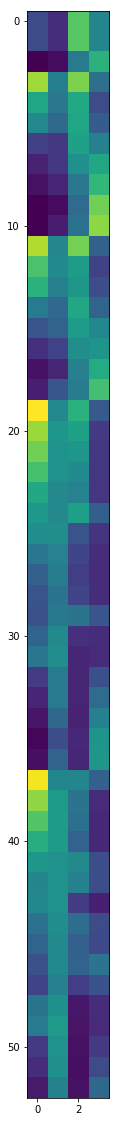

In [240]:
plt.figure(figsize = (100,20))
plt.imshow(tmp)

In [1]:
tmp

NameError: name 'tmp' is not defined